# 📌 Agenda  

## 1. Basic Barcharts  
- **1.1** Barcharts of Values (Frequencies are Pre-computed)  
- **1.2** Barcharts of Counts  
- **1.3** Barcharts with Two Categorical Variables  
  - Side-by-side Bars vs. Faceting  
- **1.4** Barcharts with More Categorical Variables  
- **1.5** Barcharts with Numeric X-axis  

## 2. More on Barcharts  
- **2.1** Bars and Text Justification  
- **2.2** Bars and Conditional Text Justification  
- **2.3** Changing the Bar Order  

## 3. (A Sort of) Dotcharts  

## 4. Piecharts  

## 5. Association Between Categorical Variables  
- **5.1** Mosaic Plots  
- **5.2** Heat Maps  


---
---
---

## 1. Basic Barcharts  
**1.1** Barcharts of Values (Frequencies are Pre-computed)  

In [80]:
library(vcd)
library(tidyverse)
library(readxl)
library(lubridate)
options(scipen = 999)

In [69]:
data_path = '../DataSets'

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 1: </b>
  <div>Load students dataframe</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

In [33]:
file = "anonymized_students_FEAA_2014.xlsx"
studs = read_excel(file.path(data_path, file), sheet = 1, col_names = TRUE, skip = 0)
## display the data frame structure
glimpse(studs)

Rows: 6,492
Columns: 12
$ LEVEL_OF_STUDY    <chr> "undergraduate", "undergraduate", "undergraduate", "…
$ ATTENDANCE        <chr> "Regular", "Regular", "Regular", "Regular", "Regular…
$ YEAR_OF_STUDY     <chr> "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I…
$ PROGRAMME         <chr> "Public Administration", "Public Administration", "P…
$ LOCATION          <chr> "Iaşi", "Iaşi", "Iaşi", "Iaşi", "Iaşi", "Iaşi", "Iaş…
$ LECTURE_GROUP     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ LAB_GROUP         <dbl> 1, 5, 6, 5, 2, 1, 4, 6, 2, 1, 1, 3, 2, 3, 3, 1, 1, 1…
$ FINANCIAL_SUPPORT <chr> "state support", "state support", "state support", "…
$ FAMILY_NAME       <chr> "BERCU", "DANDEA", "BALTARIU", "ŞOIMU", "BUCATARU", …
$ MIDDLE_NAME       <chr> "D.", "C.", "C.", "V.", "T.", "D.", "M.", "F.D.", "M…
$ FIRST_NAME        <chr> "MARIANA-SIMONA", "GEORGIAN-VLĂDUŢ", "LUIZA-LARISA",…
$ STUD_ID           <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 2:</b>
  <div>Filter and mutate data: only undergraduate, count by course name</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

In [6]:
data <- studs %>%
     filter (
       LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
       !str_detect(PROGRAMME, "^Common courses")
     ) %>%
     dplyr::group_by(PROGRAMME) %>%
     summarise(n_of_studs = n()) %>%
     ungroup()
data

PROGRAMME,n_of_studs
<chr>,<int>
Accounting and Information Systems,650
Business Administration (EN),157
Business Informatics,256
Finance and Banking,292
International Business,215
Management,533
Marketing,301
Public Administration,545
Statistics and Economic Forecast,69



<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  A very basic bar plot
</div>

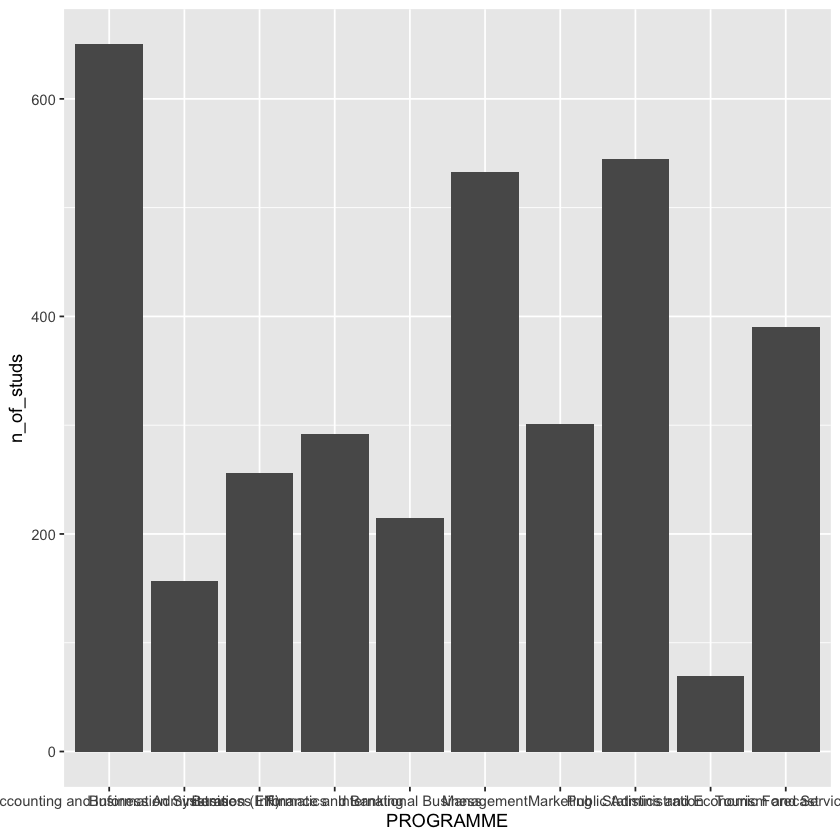

In [7]:
ggplot(
  data = data, 
  aes(x = PROGRAMME, y = n_of_studs)
  ) +
geom_bar(stat="identity")

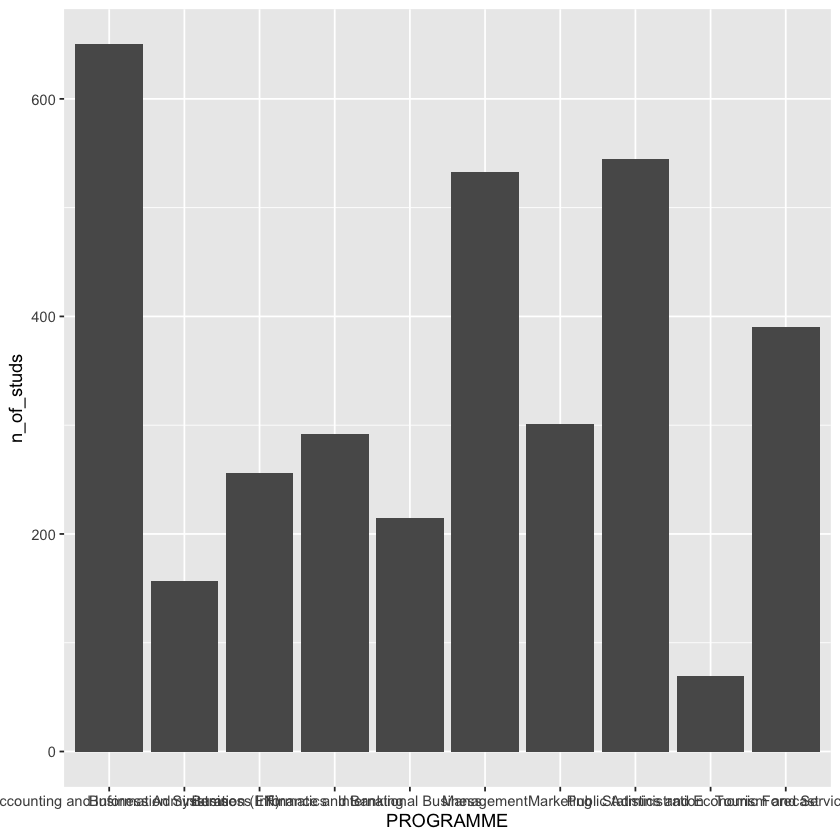

In [10]:
ggplot(
  data = data, 
  aes(x = PROGRAMME, y = n_of_studs)
  ) +
geom_col()

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 3:</b>
  <div>Map the programme to different fill colors.</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

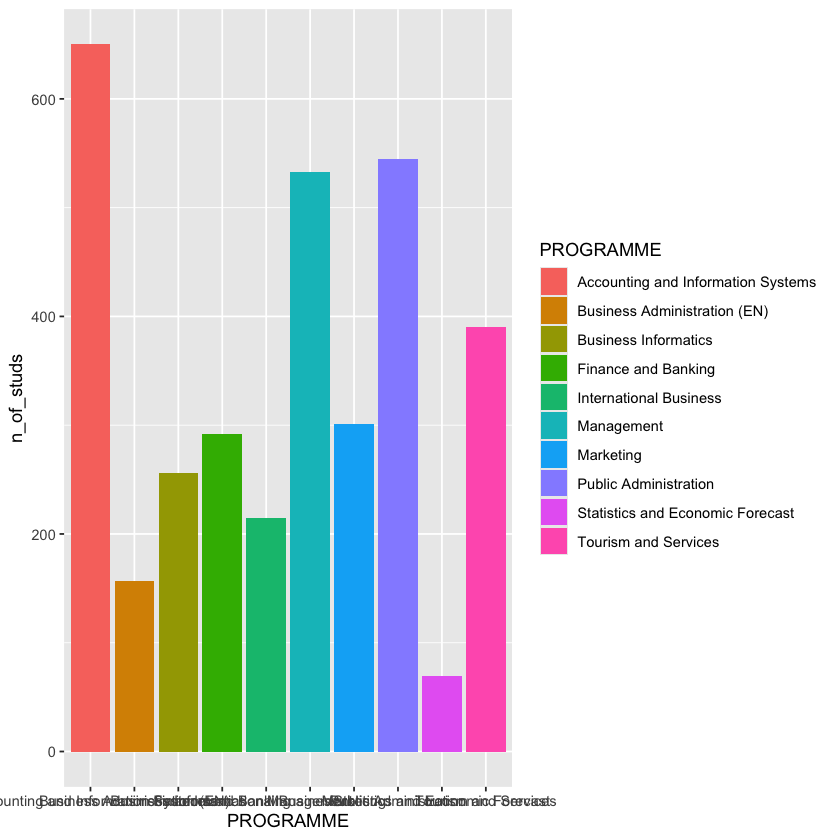

In [70]:
ggplot(
  data = data, 
  aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)
  ) +
	geom_bar(stat="identity")

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 4:</b>
  <div>Add black outline to each bar. Remove the legend.</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

List of 1
 $ legend.position: chr "none"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

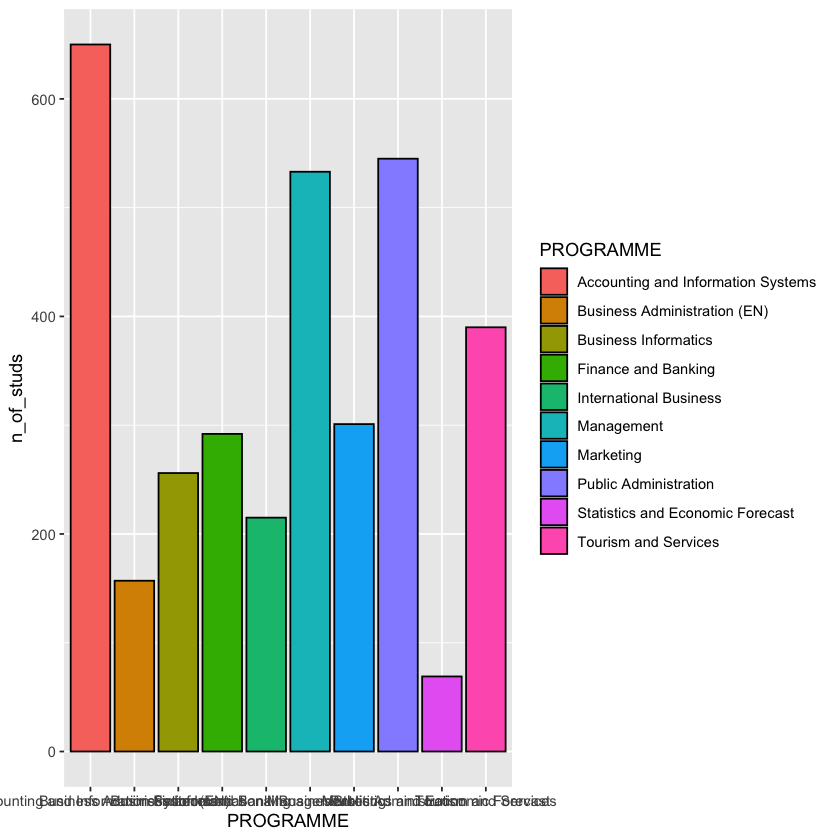

In [83]:
ggplot(
      data = data, 
      aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)
  ) +
    geom_bar(colour="black", stat="identity")
    theme(legend.position="none")

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 5:</b>
  <div>Add title, narrow the bars, use a gray fill, and change axis labels</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

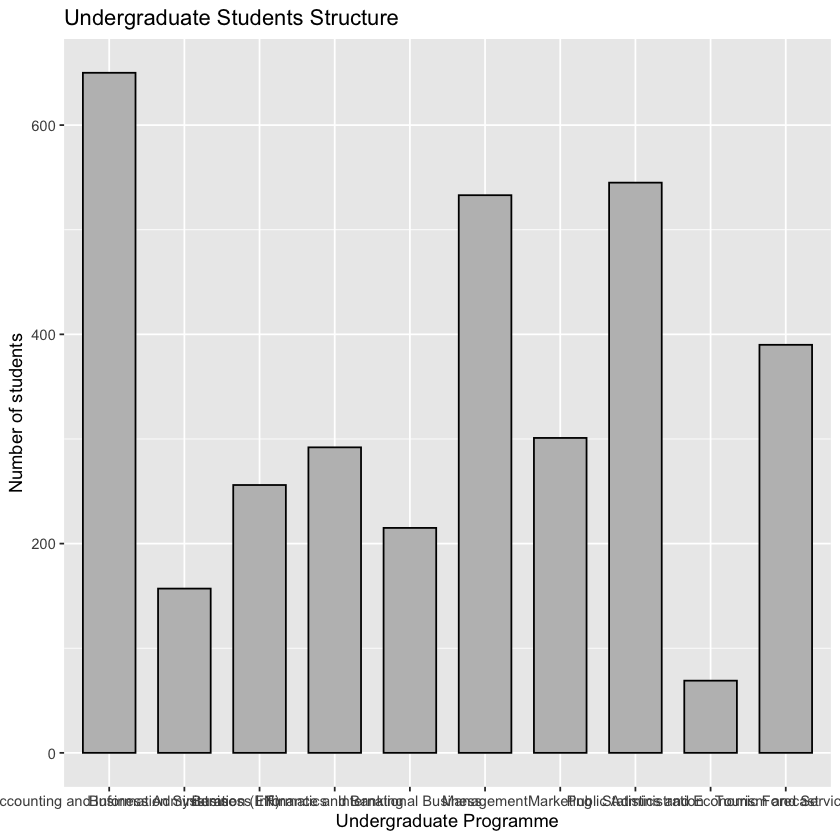

In [72]:
ggplot(
  data = data, 
  aes(x = PROGRAMME, y = n_of_studs,fill = PROGRAMME)
  ) +
  geom_bar(colour="black", fill="gray",width=.7, stat="identity") +
  theme(legend.position="none") + # this will remove the legend
  xlab("Undergraduate Programme") + ylab("Number of students") +
  ggtitle("Undergraduate Students Structure")

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 6:</b>
  <div>Adjust the angle of x axis ticks and center the title</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

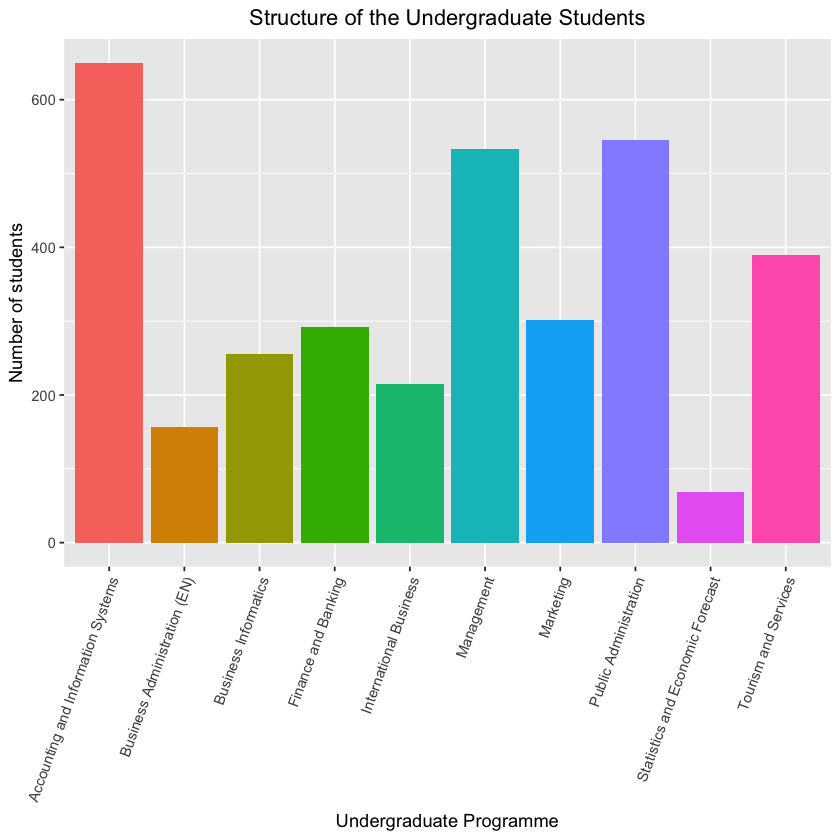

In [86]:
ggplot(
  data = data, 
  aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)
  ) +
  geom_bar(stat="identity") +
  theme(legend.position="none") + # this will remove the legend
  xlab("Undergraduate Programme") + ylab("Number of students") +
  ggtitle("Structure of the Undergraduate Students") +
  theme(
    axis.text.x = element_text(
      angle = 70, # (better for the neck)
      vjust = 1, # it was changes vertical justification (position near to bar center)
      hjust = 1 )
    ) +
  theme(plot.title = element_text(hjust = 0.5))  # center the title


**1.2** Simple barcharts of counts

In [87]:
Arthritis = Arthritis %>%
     mutate (Improved  = factor(Improved,
	          levels=c("None", "Some", "Marked")))
glimpse(Arthritis)

Rows: 84
Columns: 5
$ ID        <int> 57, 46, 77, 17, 36, 23, 75, 39, 33, 55, 30, 5, 63, 83, 66, 4…
$ Treatment <fct> Treated, Treated, Treated, Treated, Treated, Treated, Treate…
$ Sex       <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, …
$ Age       <int> 27, 29, 30, 32, 46, 58, 59, 59, 63, 63, 64, 64, 69, 70, 23, …
$ Improved  <ord> Some, None, None, Marked, Marked, Marked, None, Marked, None…


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 7:</b>
  <div>Display the values frequency for attribute `Improved`</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

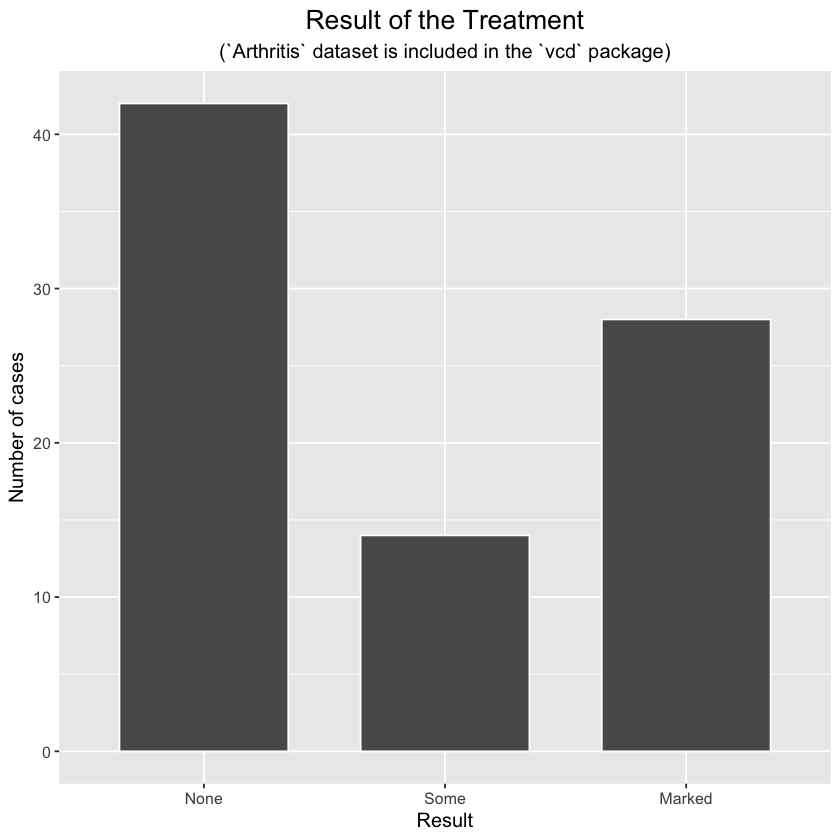

In [17]:
ggplot(
  Arthritis,
  aes(x = factor(Improved),)
  ) +
	geom_bar(width = 0.7, color="white") +
    ggtitle(
	  "Result of the Treatment",
    subtitle = "(`Arthritis` dataset is included in the `vcd` package)"
  ) +
	theme(
	  plot.title = element_text (colour="black", size="16", hjust = 0.5)
  ) +
  theme(
    plot.subtitle = element_text (colour="black", size="12", hjust = 0.5)
  )+
	theme(text=element_text(size=12)) +
  ylab("Number of cases") + xlab("Result") +
  theme(legend.position="none")  # no legend

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 8:</b>
  <div>Do the same for 'Sex' Attribute</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

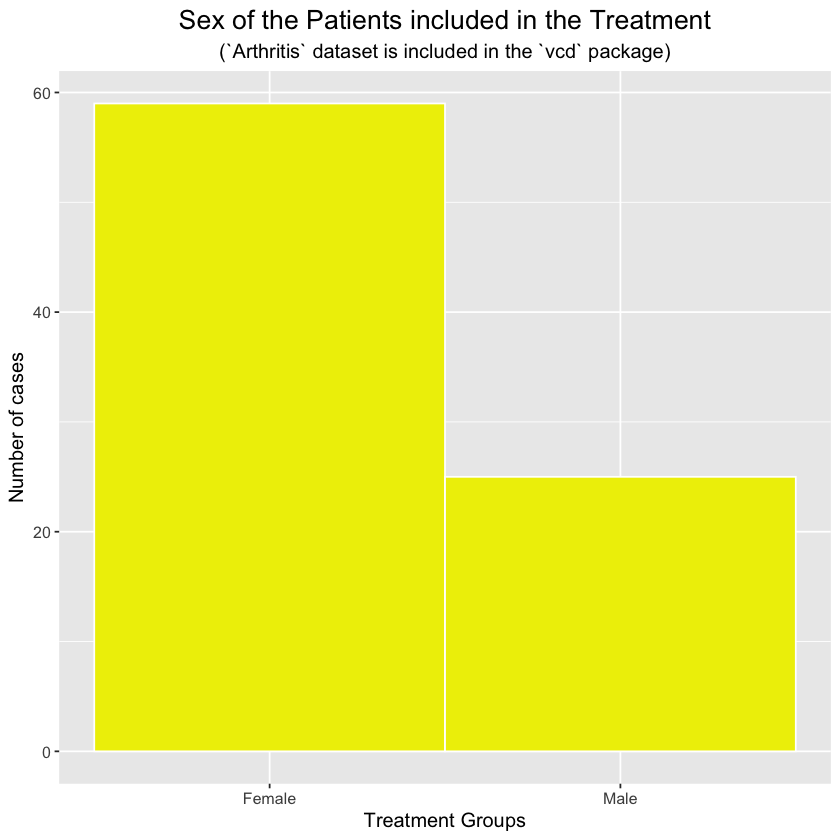

In [18]:
ggplot(
  Arthritis, 
  aes(x = factor(Sex))
  ) +
	geom_bar(width = 1, color="white", fill = "yellow2") +
	ggtitle(
	  "Sex of the Patients included in the Treatment",
	  subtitle = "(`Arthritis` dataset is included in the `vcd` package)"
  ) +
	theme (
	  plot.title = element_text (colour="black", size="16", hjust = 0.5)
  )+
  theme(
    plot.subtitle = element_text (colour="black", size="12", hjust = 0.5)
  )+
	theme(text=element_text(size=12)) +
  ylab("Number of cases") + xlab("Treatment Groups") +
  theme(legend.position="none")  # no legend


**1.3** Barcharts with two categorical variables

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 9:</b>
Display the same undergraduate student structure (as horizontal bars); for each programme, visualize the proportion of `state support` vs. `tuition fee` students (variable `FINANCIAL_SUPPORT`)
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

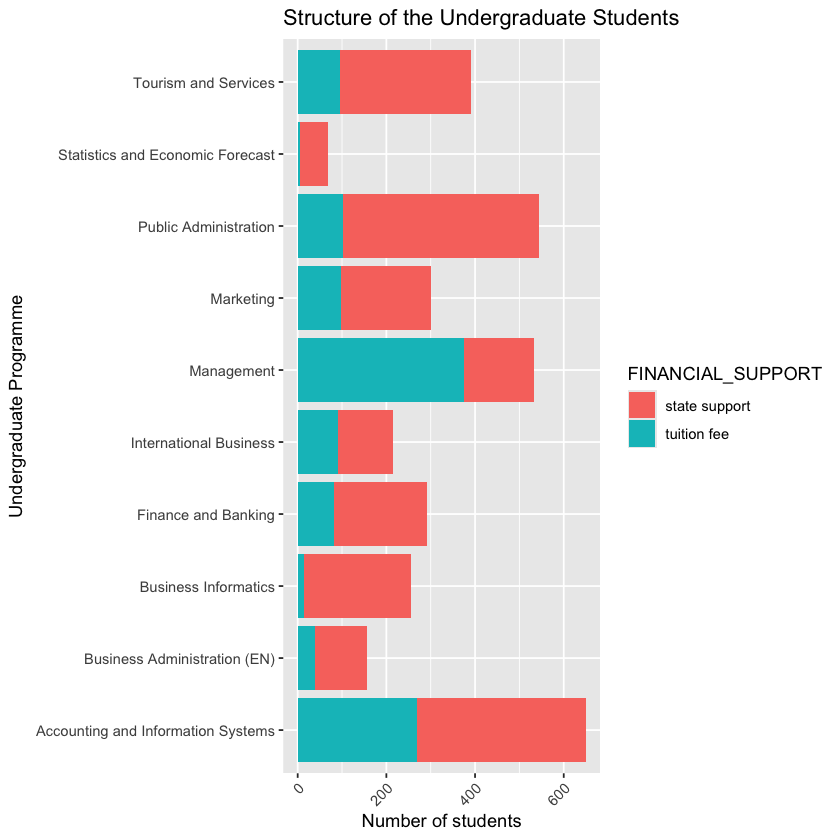

In [19]:
ggplot(
  data = studs %>%
            filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")),
     aes(x = PROGRAMME, fill = FINANCIAL_SUPPORT)) +
     geom_bar() +
     coord_flip()  +   # horizontal bars
     xlab("Undergraduate Programme") + ylab("Number of students") +
     ggtitle("Structure of the Undergraduate Students") +
     theme(axis.text.x = element_text(angle = 45,
               vjust = 1,
               hjust = 1 ))

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 10:</b>
Move legend to bottom
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

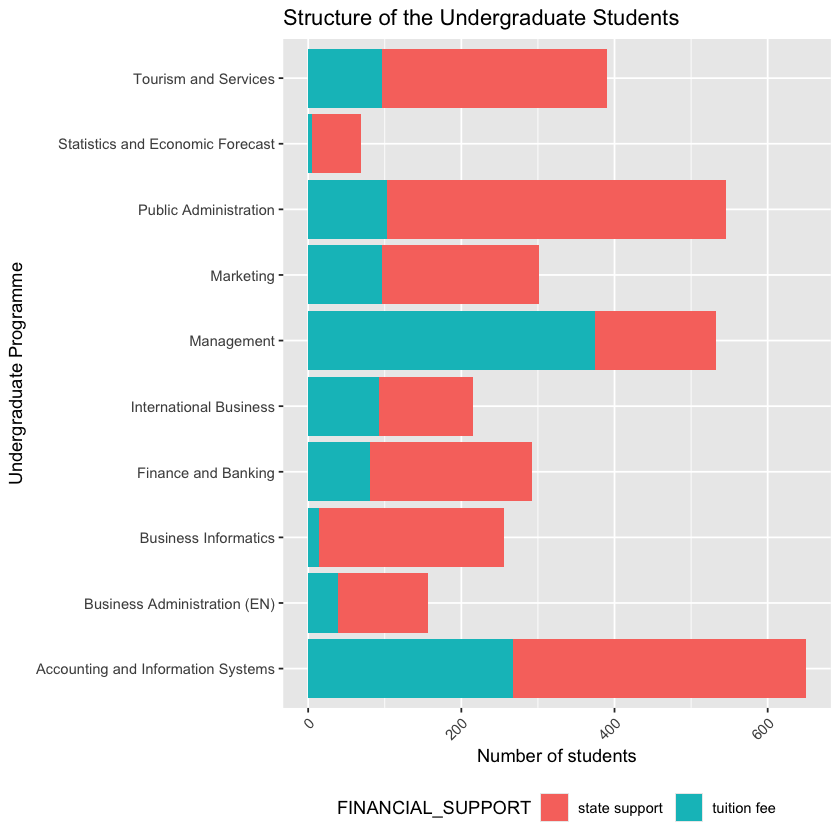

In [20]:
ggplot(data = studs %>%
            filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")),
     aes(x = PROGRAMME, fill = FINANCIAL_SUPPORT)) +
     geom_bar() +
     coord_flip()  +   # horizontal bars
     xlab("Undergraduate Programme") + ylab("Number of students") +
     ggtitle("Structure of the Undergraduate Students") +
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 )) +
     theme(legend.position="bottom")

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 11:</b>
Use stacked bars instead of side by side bars
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

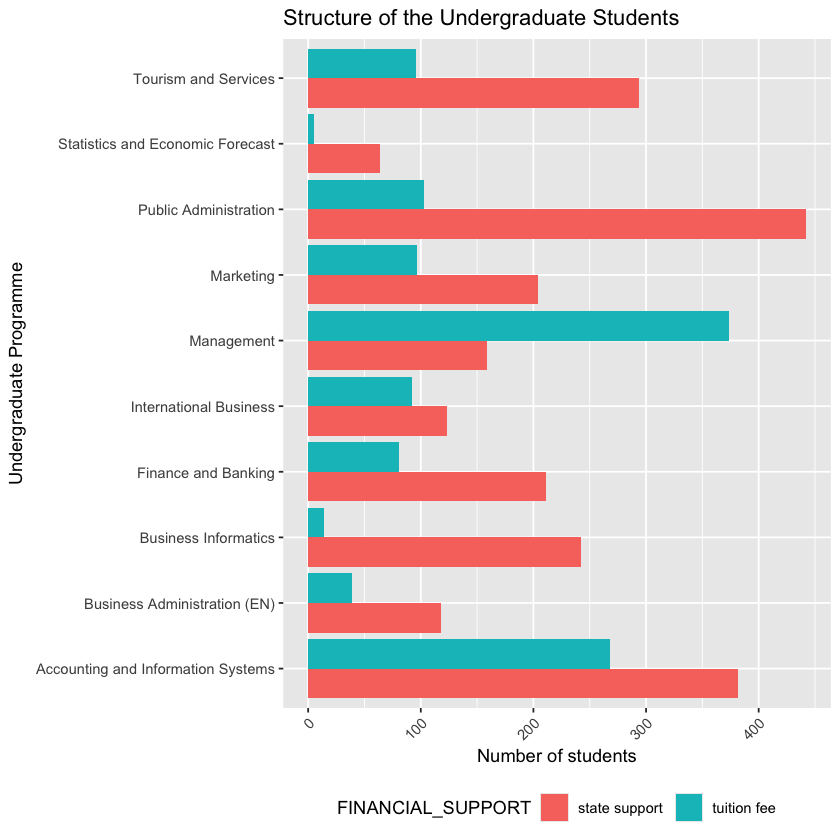

In [21]:
ggplot(
  data = studs %>%
          filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
          !str_detect(PROGRAMME, "^Common courses")),
  aes(x = PROGRAMME, fill = FINANCIAL_SUPPORT)) +
  geom_bar(position=position_dodge()) + # side-by-side bars
  coord_flip()  +   # horizontal bars
  xlab("Undergraduate Programme") + ylab("Number of students") +
  ggtitle("Structure of the Undergraduate Students") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 )) +
  theme(legend.position="bottom")

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 12:</b>
Use facet wrap
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

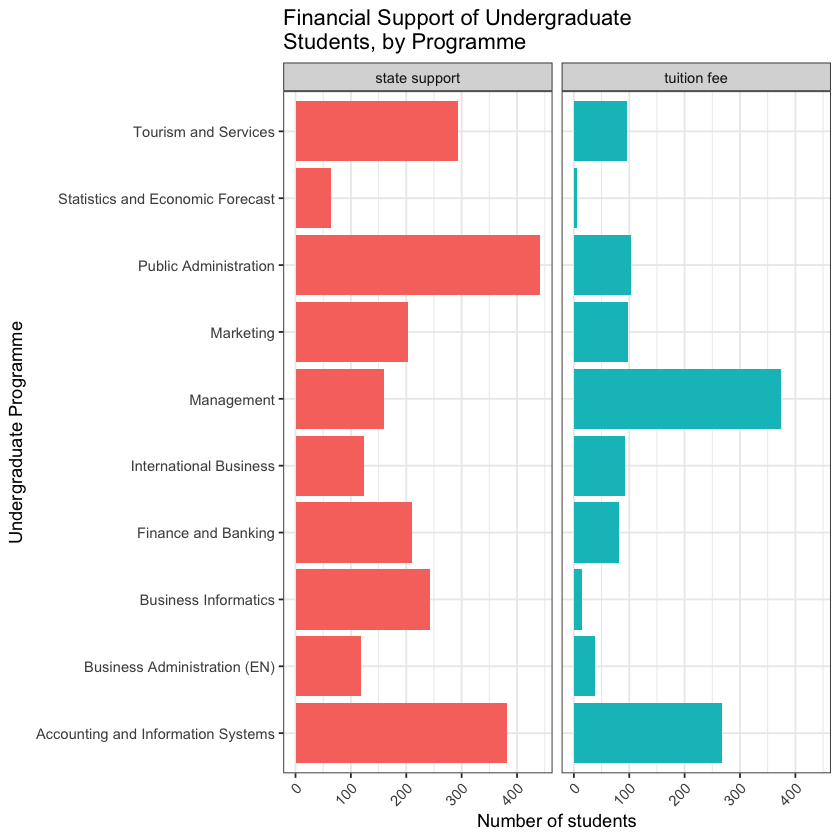

In [22]:
ggplot(data = studs %>%
            filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")),
     aes(x = PROGRAMME, fill = FINANCIAL_SUPPORT)) +
     geom_bar(position = position_dodge()) + # side-by-side bars
     coord_flip()  +   # horizontal bars
     theme_bw() +   # a new theme (must be inserted before the other `themes`)
     xlab("Undergraduate Programme") + ylab("Number of students") +
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 )) +
     ggtitle("Financial Support of Undergraduate \nStudents, by Programme") +
          # notice the title wraping
     facet_wrap( ~ FINANCIAL_SUPPORT) +
     theme(legend.position="none") # remove the legend


**1.4** Barcharts with three (or more) categorical variables

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 13:</b>
Undergraduate students must be compared on each programme by two variables
    <br>(1) the financial support
    <br>(2) attendance (Regular or Distance Learning (DL))
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

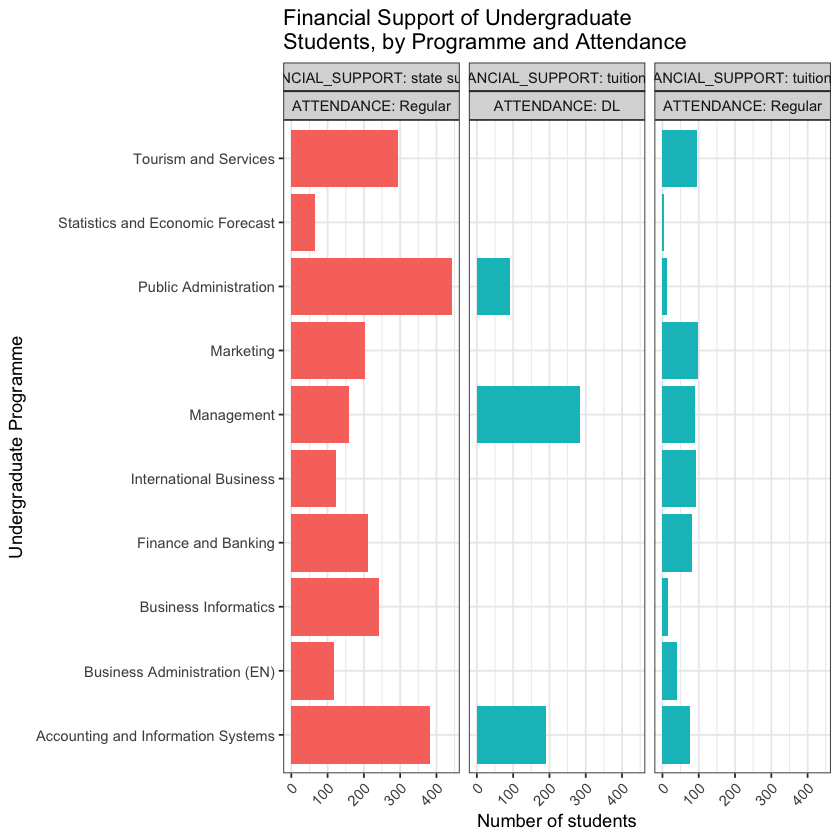

In [23]:
ggplot(data = studs %>%
            filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")),
     aes(x = PROGRAMME, fill = FINANCIAL_SUPPORT)) +
     geom_bar(position = position_dodge()) + # side-by-side bars
     coord_flip()  +   # horizontal bars
     theme_bw() +   # a new theme (must be inserted before the other `themes`)
     xlab("Undergraduate Programme") + ylab("Number of students") +
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 )) +
     ggtitle("Financial Support of Undergraduate \nStudents, by Programme and Attendance") +
          # notice the title wraping
     facet_wrap( FINANCIAL_SUPPORT ~ ATTENDANCE, labeller = label_both) +
     theme(legend.position="none") # remove the legend


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 14:</b>
Use facet grid and notice the differences
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

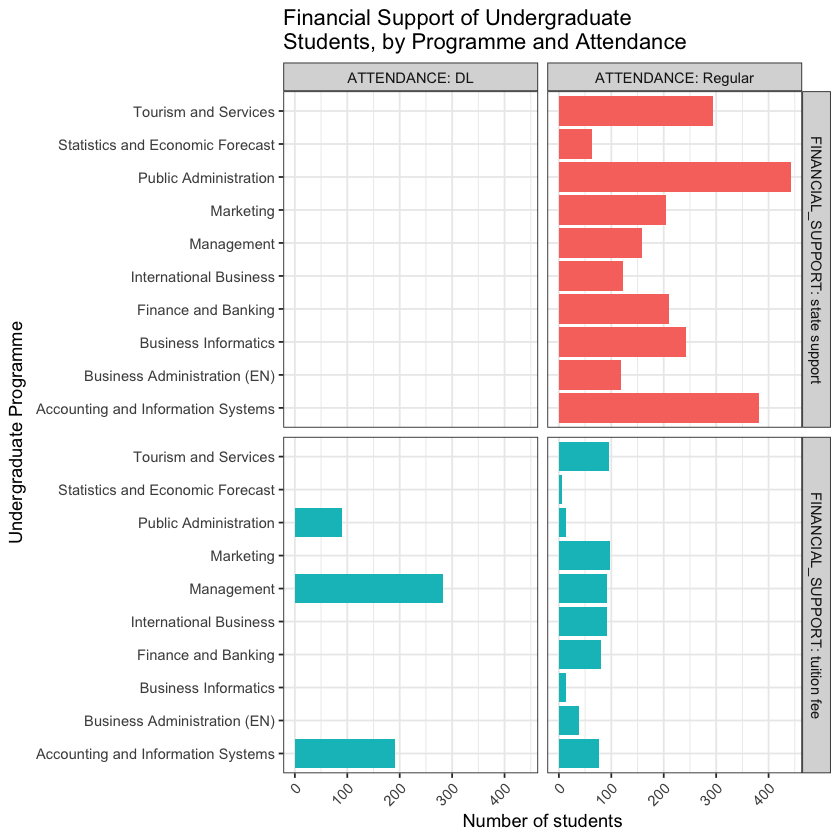

In [24]:
ggplot(data = studs %>%
            filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")),
     aes(x = PROGRAMME, fill = FINANCIAL_SUPPORT)) +
     geom_bar(position = position_dodge()) + # side-by-side bars
     coord_flip()  +   # horizontal bars
     theme_bw() +   # a new theme (must be inserted before the other `themes`)
     xlab("Undergraduate Programme") + ylab("Number of students") +
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 )) +
     ggtitle("Financial Support of Undergraduate \nStudents, by Programme and Attendance") +
          # notice the title wraping
     facet_grid( FINANCIAL_SUPPORT ~ ATTENDANCE, labeller = label_both) +
     theme(legend.position="none") # remove the legend


**1.5** Barcharts with numeric x-axis

When the variable on the x-axis is numeric, it is sometimes useful to treat it as continuous, and sometimes useful to treat it as categorical. That could entail some differences in the result


In [25]:
load(file = file.path(data_path, 'sales.RData'))
glimpse(invoice_detailed)

Rows: 154
Columns: 17
$ invoiceno         <dbl> 1111, 1111, 1111, 1112, 1112, 1113, 1114, 1114, 1114…
$ invoicedate       <date> 2016-08-01, 2016-08-01, 2016-08-01, 2016-08-01, 201…
$ customerid        <dbl> 1001, 1001, 1001, 1005, 1005, 1002, 1006, 1006, 1006…
$ customername      <chr> "Client 1 SRL", "Client 1 SRL", "Client 1 SRL", "Cli…
$ place             <chr> "Iasi", "Iasi", "Iasi", "Timisoara", "Timisoara", "I…
$ countyname        <chr> "Iasi", "Iasi", "Iasi", "Timis", "Timis", "Iasi", "N…
$ region            <chr> "Moldova", "Moldova", "Moldova", "Banat", "Banat", "…
$ comments          <chr> NA, NA, NA, "Delivery problems", "Delivery problems"…
$ invoicerownumber  <dbl> 1, 2, 3, 1, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 2, 3…
$ productid         <dbl> 1, 2, 5, 2, 3, 2, 2, 4, 5, 2, 2, 2, 1, 2, 1, 2, 3, 4…
$ productname       <chr> "Product 1", "Product 2", "Product 5", "Product 2", …
$ unitofmeasurement <chr> "b500ml", "kg", "unit", "kg", "kg", "kg", "kg", "l",…
$ category        

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


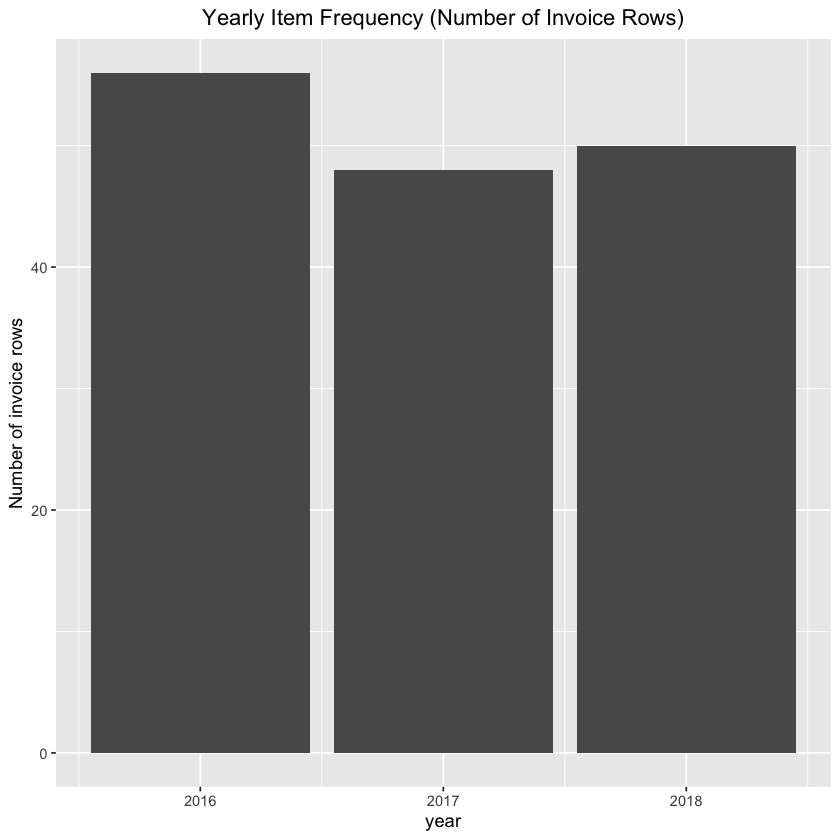

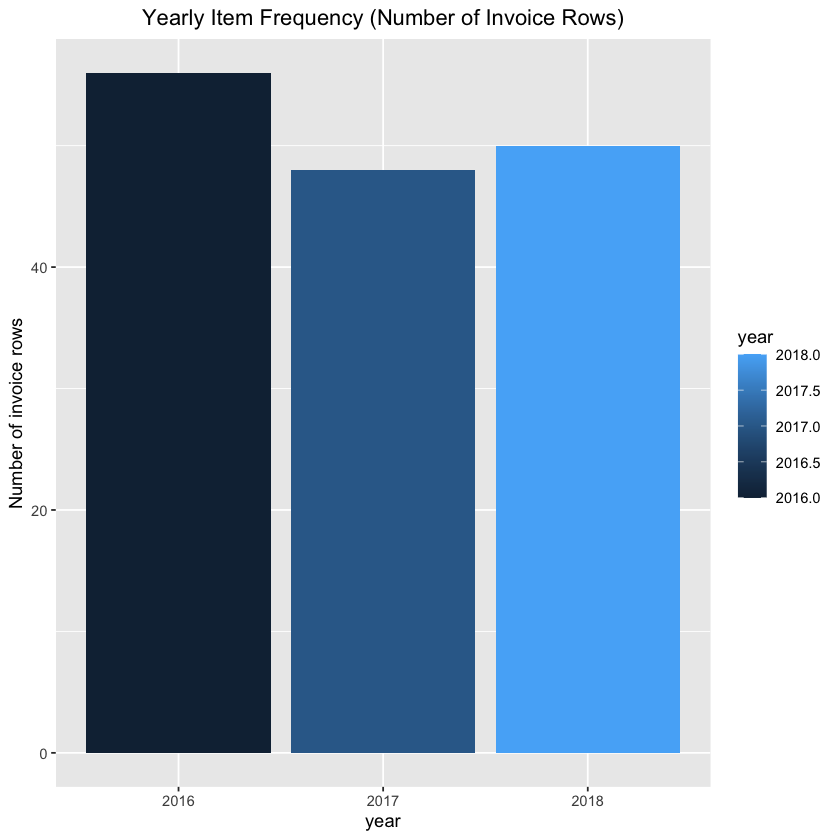

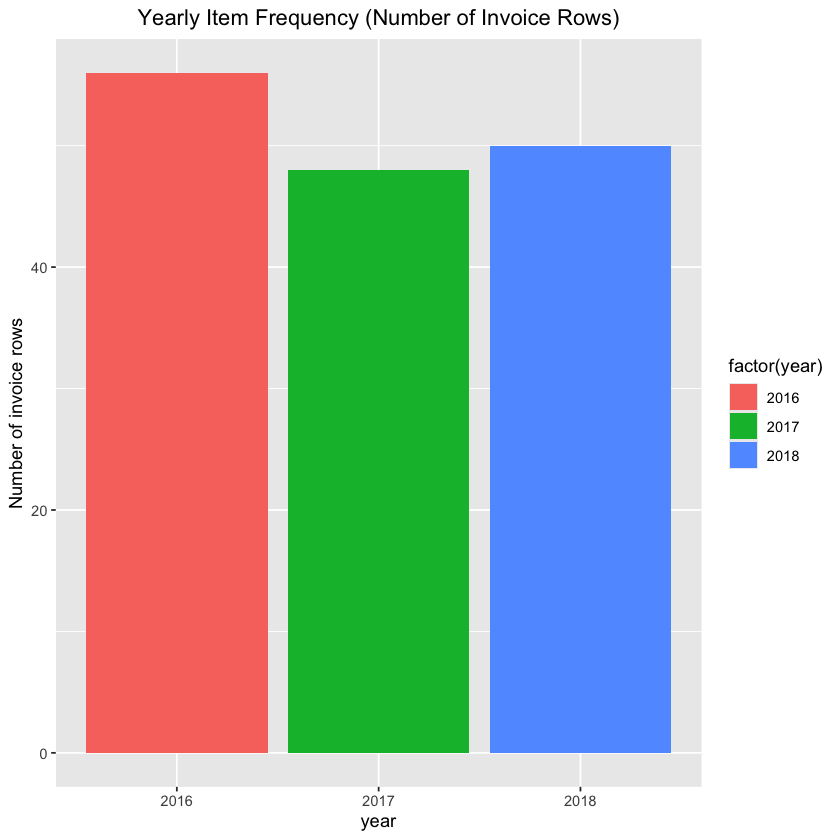

In [26]:
# in the first version, `year` is declared on the x axis, as it is
#    (number); also in the `fill` argument
ggplot(invoice_detailed %>% mutate (year = year(invoicedate)),
     aes (x = year, fill = year )) +
     geom_bar() +
     xlab("year") + ylab("Number of invoice rows") +
     ggtitle("Yearly Item Frequency (Number of Invoice Rows)") +
     theme(plot.title = element_text(hjust = 0.5))   # center the title

# in the second version, `year` is declared as factor on the x axis,
#    and as it is (number) in the `fill` argument
#  (notice that here the legend appears with intriguing values)
ggplot(invoice_detailed %>% mutate (year = year(invoicedate)),
     aes (x = factor(year), fill = year )) +
     geom_bar() +
     xlab("year") + ylab("Number of invoice rows") +
     ggtitle("Yearly Item Frequency (Number of Invoice Rows)") +
     theme(plot.title = element_text(hjust = 0.5))   # center the title

# in the third version, `year` is declared as factor on both the x axis,
#    and in the `fill` argument
 #  (notice that here the legend appears with proper values)
ggplot(invoice_detailed %>% mutate (year = year(invoicedate)),
     aes (x = factor(year), fill = factor(year))) +
     geom_bar() +
     xlab("year") + ylab("Number of invoice rows") +
     ggtitle("Yearly Item Frequency (Number of Invoice Rows)") +
     theme(plot.title = element_text(hjust = 0.5))   # center the title

## 2. More on barcharts
**2.1** Bars and Text Justification  

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 14:</b>
Display the structure of undergraduate students, by programme (like in section I.1); this time, for each programme, add a text showing the number the student enrolled in the programme, place it inside the bar
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

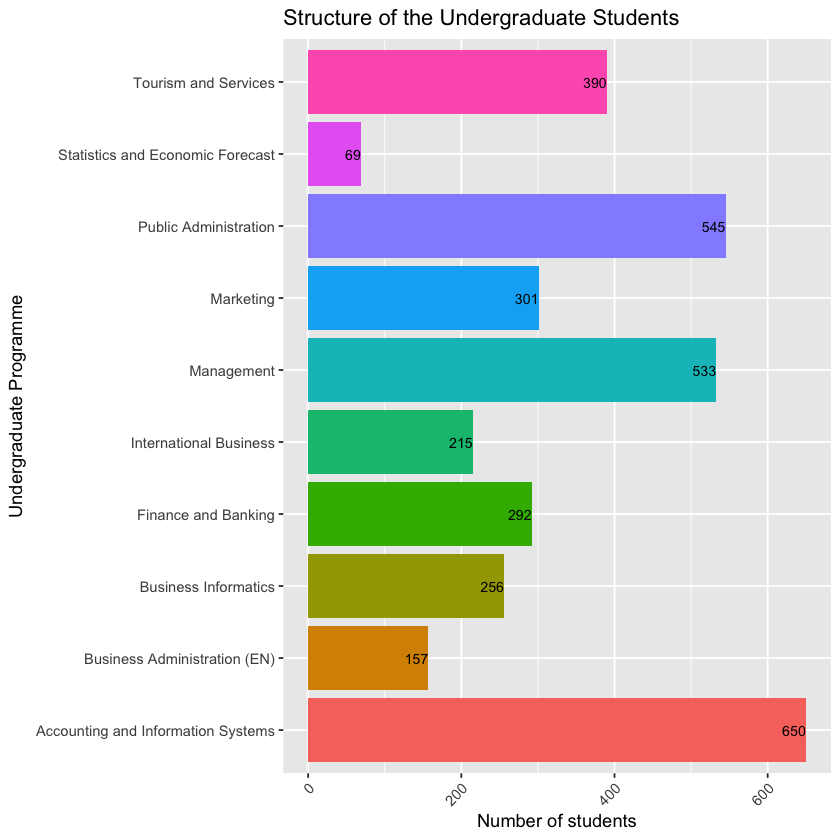

In [77]:
ggplot(data = studs %>%
          filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")) %>%
          group_by(PROGRAMME) %>%
          summarise(n_of_studs = n()),
     aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)) +
     geom_bar(stat="identity") +
     coord_flip()  +   # horizontal bars
     geom_text(aes(x = PROGRAMME, y = n_of_studs, label = n_of_studs),
               hjust = 1, size = 3) + # display the text inside the bar
     theme(legend.position="none") + # no legend
     xlab("Undergraduate Programme") + ylab("Number of students") +
     ggtitle("Structure of the Undergraduate Students") +
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

In [88]:
library(shiny)
library(ggplot2)
library(dplyr)
library(stringr)

ui <- fluidPage(
  titlePanel("Undergraduate Programme Structure"),
  
  sidebarLayout(
    sidebarPanel(
      sliderInput("vjust_slider", 
                  "Vertical Justification (vjust):", 
                  min = -1, max = 2, value = 1, step = 0.1),
      sliderInput("hjust_slider", 
                  "Horizontal Justification (hjust):", 
                  min = -1, max = 2, value = 1.1, step = 0.1)
    ),
    
    mainPanel(
      plotOutput("bar_plot")
    )
  )
)

# Define the server
server <- function(input, output) {
  
  output$bar_plot <- renderPlot({
    
    ggplot(data = studs %>%
             filter(LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                      !str_detect(PROGRAMME, "^Common courses")) %>%
             group_by(PROGRAMME) %>%
             summarise(n_of_studs = n(), .groups = "drop"),  # Add .groups = "drop" to ensure proper ungrouping
           aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)) +
      geom_bar(stat="identity") +
      coord_flip() +  # horizontal bars
      geom_text(aes(x = PROGRAMME, y = n_of_studs, label = n_of_studs),
                hjust = input$hjust_slider, vjust = input$vjust_slider, size = 3) + # dynamic text placement
      theme(legend.position="none") + # no legend
      xlab("Undergraduate Programme") + ylab("Number of students") +
      ggtitle("Structure of the Undergraduate Students") +
      theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))
  })
}

# Run the application
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:5438




<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
If the data is not pre-aggregated, in `geom_text` one must change two options:
<br>- stat = "count"
<br>- aes(x = PROGRAMME, y = after_stat(count), label = after_stat(count))
</div>

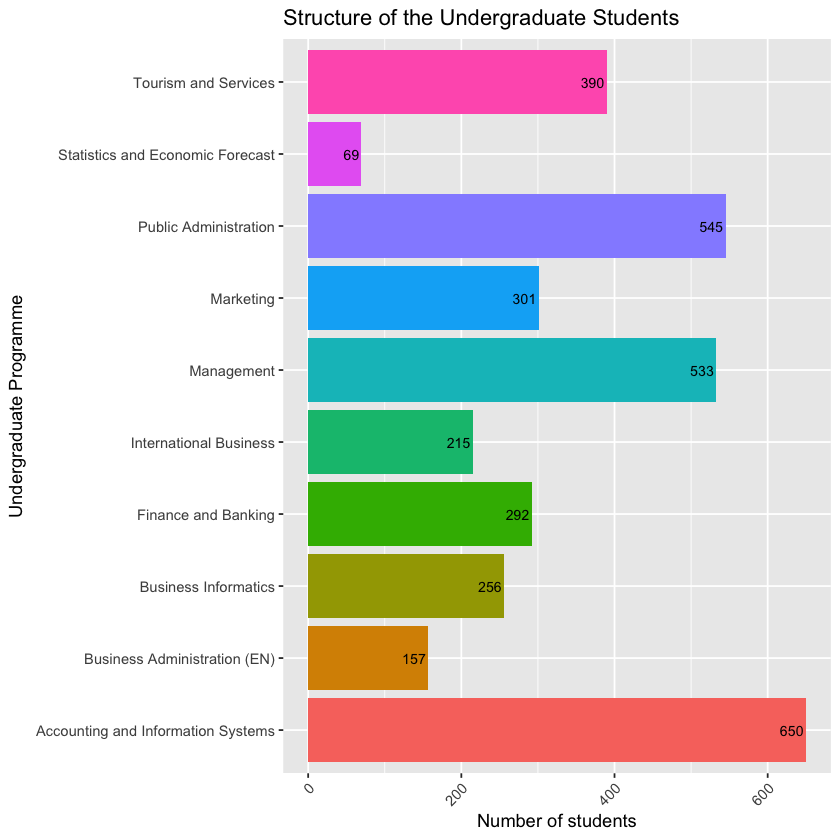

In [55]:
ggplot(data = studs %>%
          filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses")) ,
     aes(x = PROGRAMME, fill = PROGRAMME)) +
     geom_bar() +
     coord_flip()  +   # horizontal bars
     geom_text(stat = "count",
               aes(x = PROGRAMME, y = after_stat(count), label = after_stat(count)),
               hjust = 1.1, size = 3) + # display the text inside the bar
     theme(legend.position="none") + # no legend
     xlab("Undergraduate Programme") + ylab("Number of students") +
     ggtitle("Structure of the Undergraduate Students") +
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 ))


**2.2** Bars and Conditional Text Justification 

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 15:</b>
Display both the programme title and the number of students inside the bar only if the program has at least 300 students
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

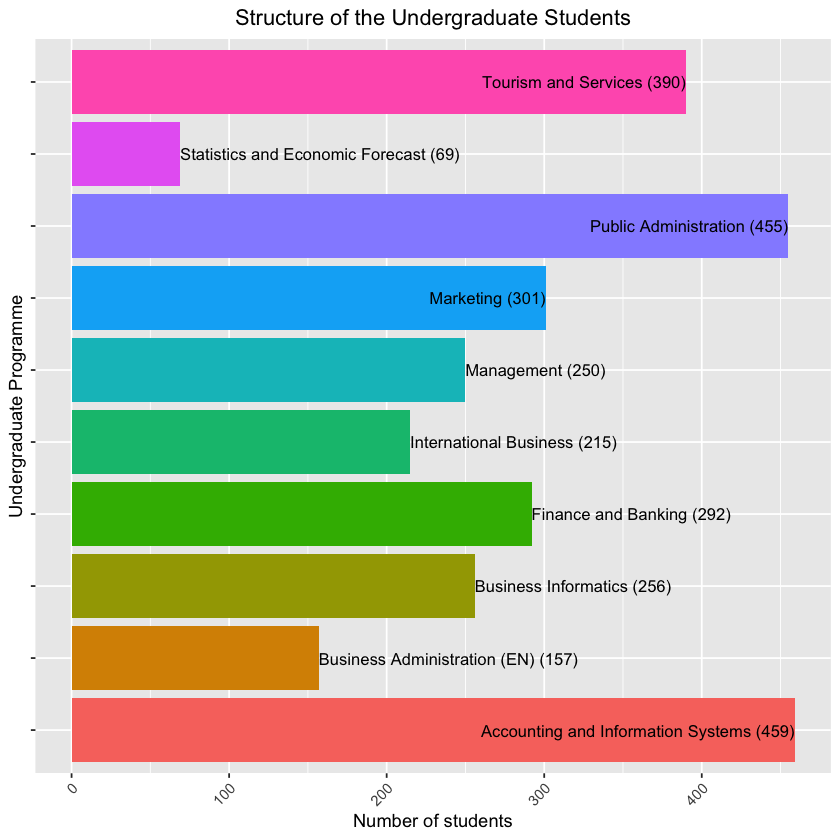

In [79]:
ggplot(
  data = studs %>%
    filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
            !str_detect(PROGRAMME, "^Common courses") & ATTENDANCE == "Regular"
    ) %>%
    group_by(PROGRAMME) %>%
    summarise(n_of_studs = n()),
  aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)
  ) +
  geom_bar(stat="identity") +
  coord_flip()  +   # horizontal bars
  geom_text(
    aes(
      x = PROGRAMME, y = n_of_studs,
      label = paste0(PROGRAMME, ' (', n_of_studs, ')' ),
      hjust = if_else( n_of_studs > 300, 1, 0) # !!!!!
     ),
     size = 3.5
  ) +
  theme(legend.position="none") + # no legend
  xlab("Undergraduate Programme") + ylab("Number of students") +
  ggtitle("Structure of the Undergraduate Students") +
  theme(plot.title = element_text(hjust = 0.5))  + # center the title
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1 )) +
  theme(axis.text.y = element_blank())


**2.3** Changing the bar order

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 16:</b>
Use previous plot but the programme bars will be ordered by the number of students 
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

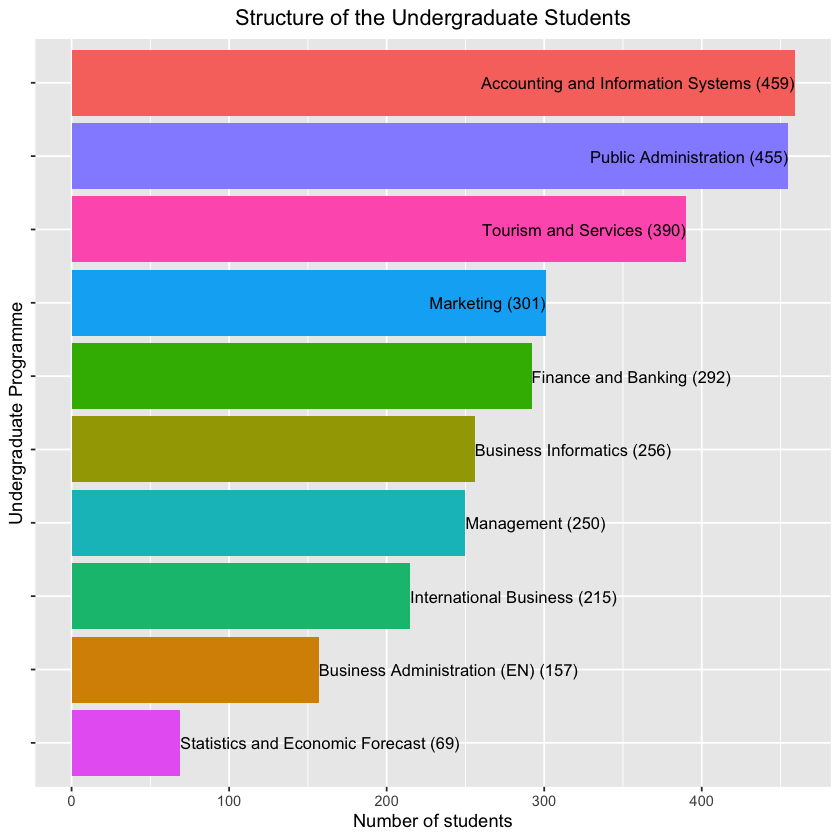

In [58]:
ggplot(
  data = studs %>%
      filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses") &
                       ATTENDANCE == "Regular") %>%
      group_by(PROGRAMME) %>%
      summarise(n_of_studs = n()),
  aes(x = reorder(PROGRAMME, n_of_studs), # this does the reordering
      y = n_of_studs, fill = PROGRAMME)
  ) +
  geom_bar(stat="identity") +
  coord_flip()  +   # horizontal bars
  geom_text(
    aes(x = PROGRAMME,
        y = n_of_studs,
        label = paste0(PROGRAMME, ' (', n_of_studs, ')' ),
        hjust = if_else( n_of_studs > 300, 1, 0) # !!!!!
    ),
    size = 3.5
  ) +
  theme(legend.position="none") + # no legend
  xlab("Undergraduate Programme") + ylab("Number of students") +
  ggtitle("Structure of the Undergraduate Students") +
  theme(plot.title = element_text(hjust = 0.5))  + # center the title
  theme(axis.text.x = element_text(angle = 0, vjust = 1, hjust = .5 )) +
  theme(axis.text.y = element_blank())

## 3. (A Sort of) Dotcharts

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 17:</b>
Use previous plot but update the bars to be dots
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

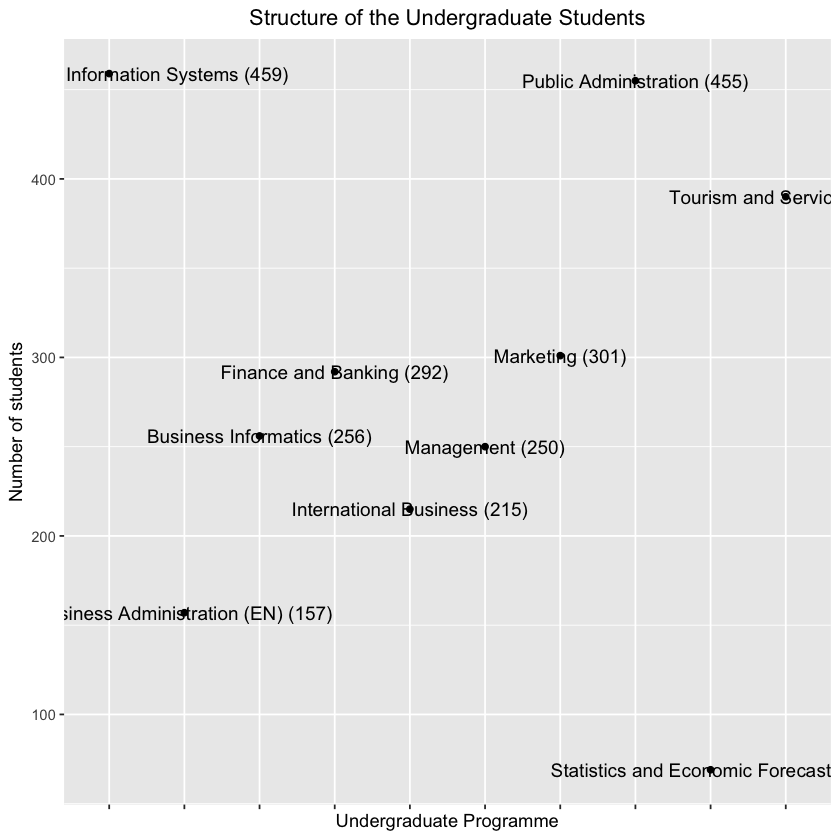

In [59]:
ggplot(data = studs %>%
          filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses") &
                       ATTENDANCE == "Regular") %>%
          group_by(PROGRAMME) %>%
          summarise(n_of_studs = n()),
     aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME)) +
     geom_point() +
     geom_text(aes(x = PROGRAMME,
                   y = n_of_studs,
                   label = paste0(PROGRAMME, ' (', n_of_studs, ')' ) ),
               size = 4) +
     theme(legend.position="none") + # no legend
     xlab("Undergraduate Programme") + ylab("Number of students") +
     ggtitle("Structure of the Undergraduate Students") +
     theme(plot.title = element_text(hjust = 0.5))  + # center the title
     theme(axis.text.x = element_blank())



<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
   Text and dots are overlapping. We can use ggrepel to update the visuals:
</div>

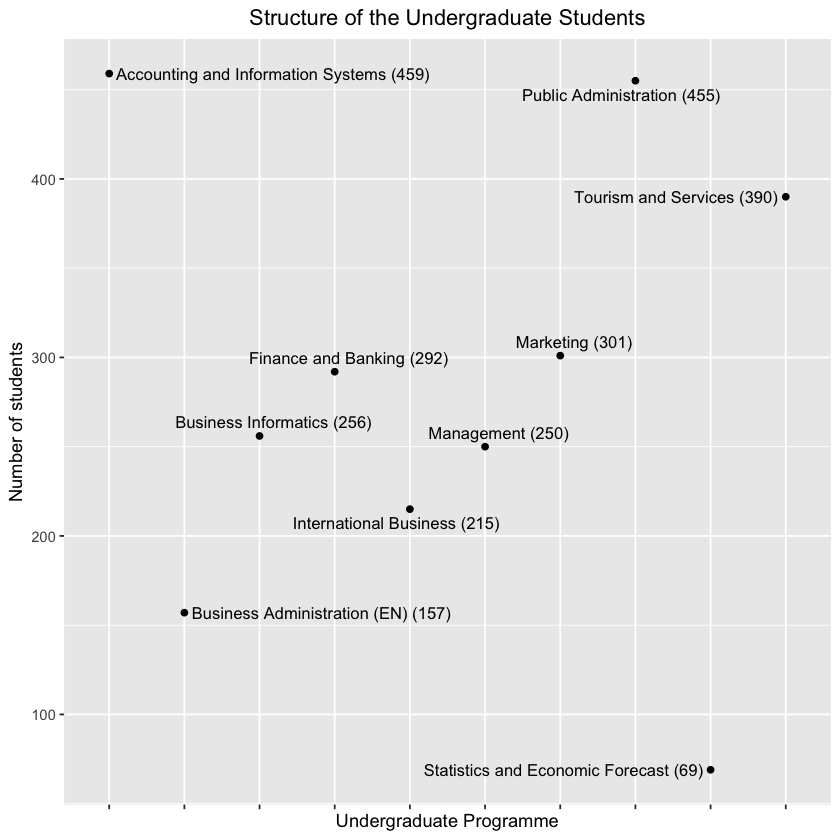

In [60]:
library(ggrepel)

# solution: instead of `geom_text` we will use `geom_text_repel`
ggplot(data = studs %>%
          filter (LEVEL_OF_STUDY == 'undergraduate' & !is.na(PROGRAMME) &
                  !str_detect(PROGRAMME, "^Common courses") &
                       ATTENDANCE == "Regular") %>%
          group_by(PROGRAMME) %>%
          summarise(n_of_studs = n()),
     aes(x = PROGRAMME, y = n_of_studs, fill = PROGRAMME) ) +
     geom_point() +
     geom_text_repel(aes(x = PROGRAMME, # geom_text_repel !!!
                   y = n_of_studs,
                   label = paste0(PROGRAMME, ' (', n_of_studs, ')' )),
               size = 3.5) +
     theme(legend.position="none") + # no legend
     xlab("Undergraduate Programme") + ylab("Number of students") +
     ggtitle("Structure of the Undergraduate Students") +
     theme(plot.title = element_text(hjust = 0.5))  + # center the title
     theme(axis.text.x = element_blank())

## 3. Piecharts

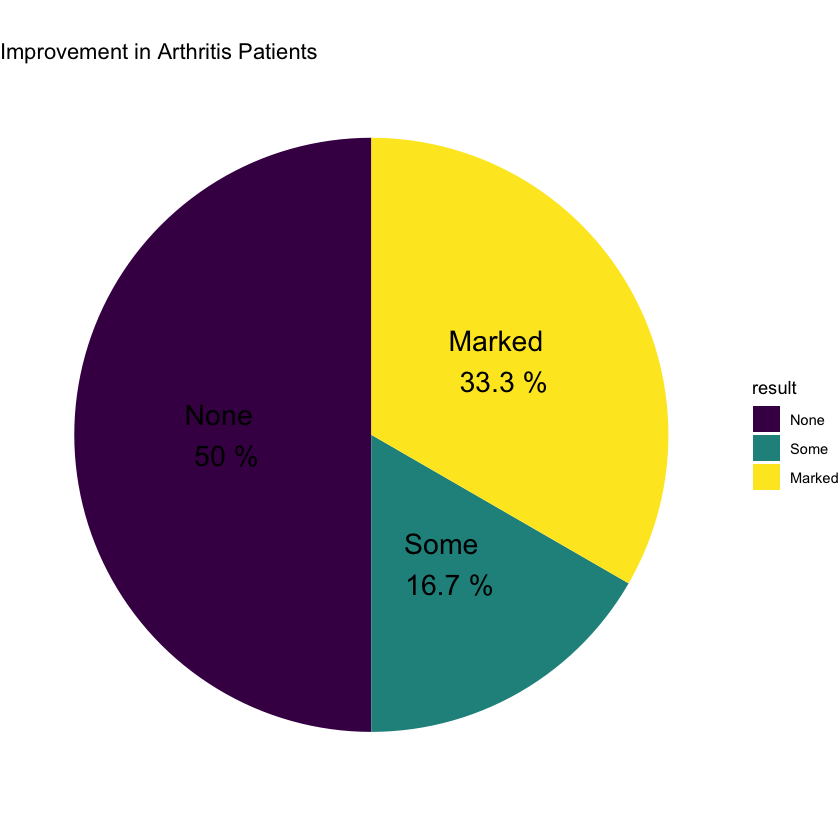

In [63]:
Arthritis %>%
  group_by(result = Improved) %>%
  summarise(n = n(), percent = n / nrow(Arthritis) * 100) %>%
  ggplot(aes(x = "", y = n, fill = result)) + 
  geom_bar(width = 1, stat = "identity") + 
  coord_polar("y", start = 0) + 
  geom_text(aes(label = paste(result, '\n', round(percent, 1), '%')), 
            position = position_stack(vjust = 0.5), size = 6) + 
  theme_void() +
  ggtitle("Improvement in Arthritis Patients")

## 5. Association between categorical variables
**5.1** Mosaic plots 


Attaching package: ‘ggmosaic’


The following objects are masked from ‘package:vcd’:

    mosaic, spine


Warning message:
“The `scale_name` argument of `continuous_scale()` is deprecated as of ggplot2
3.5.0.”
Warning message:
“The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
ℹ Please use the `transform` argument instead.”
Warning message:
“`unite_()` was deprecated in tidyr 1.2.0.
ℹ Please use `unite()` instead.
ℹ The deprecated feature was likely used in the ggmosaic package.
  Please report the issue at <https://github.com/haleyjeppson/ggmosaic>.”


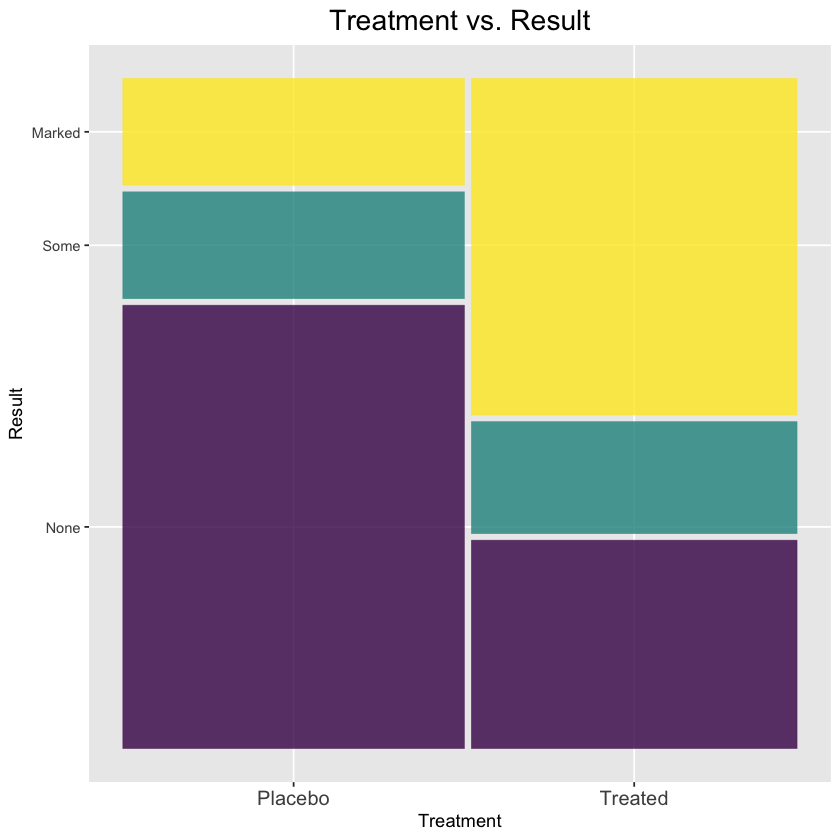

In [64]:
library(ggmosaic)
ggplot(data = Arthritis %>% mutate (Improved = factor(Improved))) +
     geom_mosaic(aes(x = product(Improved, Treatment),
                   fill=Improved), na.rm=TRUE) +
     theme(axis.text.x=element_text(angle=0, hjust= 0.5, size = 12)) +
     labs(x = "Treatment", y = "Result", title='Treatment vs. Result') +
     theme (plot.title = element_text (colour="black", size=17, hjust = 0.5)) +
     theme(legend.position = "none") # remove the lengend


**5.2** Heatmaps

`summarise()` has grouped output by 'treatment_group'. You can override using
the `.groups` argument.


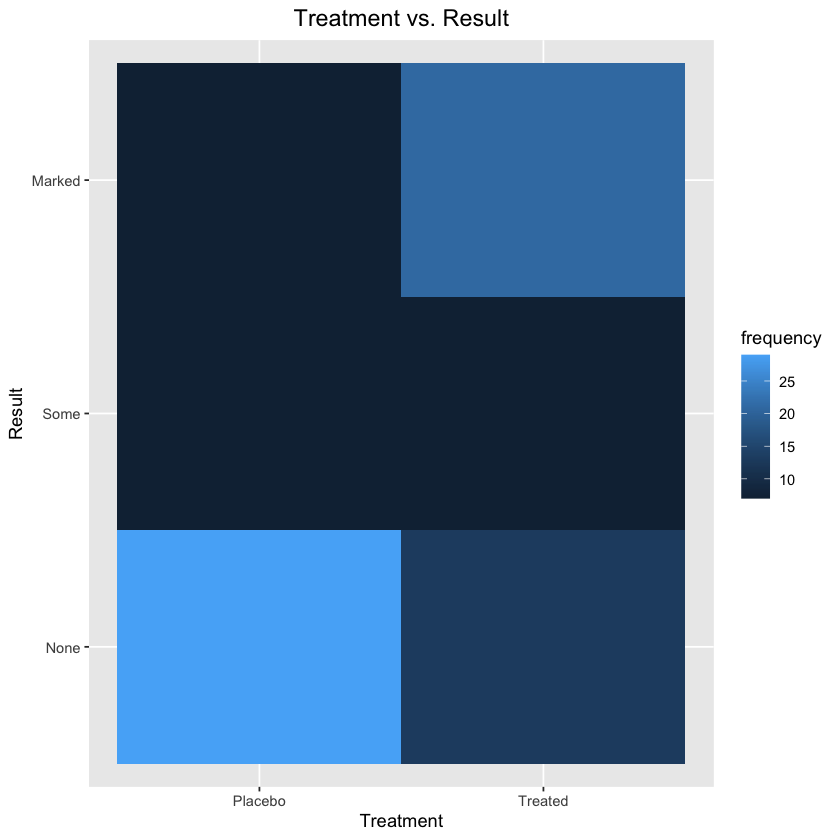

In [67]:
Arthritis %>%
     group_by(treatment_group = Treatment, result = Improved) %>%
     summarise(frequency = n()) %>%
ggplot(., aes (x = treatment_group, y = result,
               fill = frequency)) +
     geom_tile() +
     labs(x = "Treatment", y = "Result", title='Treatment vs. Result') +
     theme (plot.title = element_text (colour="black", size=14, hjust = 0.5))